<a href="https://colab.research.google.com/github/LucianoDark/Projeto/blob/master/Poker-IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install tensorflow

In [31]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [51]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data'
dataframe = pd.read_csv(URL)
dataframe.head()

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [52]:
print(dataframe.__format__)

<built-in method __format__ of DataFrame object at 0x7f01f1e186a0>


In [53]:
ds = dataframe.reset_index(drop=True)

In [54]:
train, test = train_test_split(ds, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [55]:

print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

16005 train examples
4002 validation examples
5002 test examples


In [48]:
# print(train)

       1  10  1.1  11  1.2  13  1.3  12  1.4  1.5  9
18025  3  13    4   5    2  13    1   9    1    6  1
11500  4   2    1  12    2   2    4   5    4    9  1
7918   1   7    3   5    1  13    4   9    2    8  0
10020  2   6    3   4    1   6    2   1    2    4  2
17275  2   9    1   9    1  12    2  10    3   11  1
...   ..  ..  ...  ..  ...  ..  ...  ..  ...  ... ..
9662   1   3    3  11    2   2    2   1    1    1  1
17902  4   3    1   1    1   9    2   3    2    9  2
6759   2  13    4   3    4   1    4  13    3    8  1
8133   3   1    1  13    4   2    4   5    4   12  0
13577  3   1    1  13    1   6    2   1    2    4  1

[16005 rows x 11 columns]


In [56]:
x_train=train.iloc[:, 0:10]
y_train=train.iloc[:,10]

y_test=test.iloc[:, 10]
x_test=test.iloc[:, 0:10]

In [58]:
# print(y_train)

10005    0
4296     1
19500    0
22811    0
16385    0
        ..
7486     1
8340     1
15774    1
5074     1
5833     0
Name: 9, Length: 16005, dtype: int64


In [59]:
inputs = keras.Input(shape=(10,))

In [60]:
x = keras.layers.Dense(128, activation='relu')(inputs)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(32, activation='relu')(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs,outputs=predictions)

In [61]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [66]:
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    verbose=1,
                    batch_size=1000,
                    validation_data=(x_test, y_test))

Epoch 1/500
17/17 [==============================] - 0s 8ms/step - loss: 0.6716 - accuracy: 0.7119 - val_loss: 0.7696 - val_accuracy: 0.6717
Epoch 2/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6462 - accuracy: 0.7276 - val_loss: 0.7691 - val_accuracy: 0.6769
Epoch 3/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6414 - accuracy: 0.7265 - val_loss: 0.7641 - val_accuracy: 0.6743
Epoch 4/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6551 - accuracy: 0.7194 - val_loss: 0.7647 - val_accuracy: 0.6767
Epoch 5/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6499 - accuracy: 0.7278 - val_loss: 0.7841 - val_accuracy: 0.6757
Epoch 6/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6709 - accuracy: 0.7157 - val_loss: 0.7705 - val_accuracy: 0.6745
Epoch 7/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6318 - accuracy: 0.7350 - val_loss: 0.7707 - val_accuracy: 0.6831
Epoch 8/500
1

In [67]:
model.evaluate(x_test, y_test)

157/157 [==============================] - 0s 865us/step - loss: 0.6128 - accuracy: 0.7613


[0.612849235534668, 0.76129549741745]

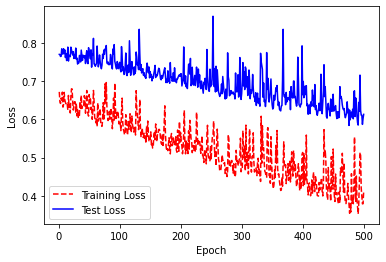

In [68]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();